In [66]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

import seaborn as sns

pd.set_option('display.max_columns', 500)

In [78]:
df = pd.read_csv('processed-data/version1.csv')
df = df.astype(float)
df.head()

,filing_rate_2020,unemployment-rate,pop_over60,Total households,Average household size,Households with own children of the householder under 18 years,Households with one or more people under 18 years,Households with one or more people 60 years and over,Householder living alone,65 years and over,Owner-occupied housing units,Renter-occupied housing units,pct_White alone,pct_Black or African American alone,pct_American Indian and Alaska Native alone,pct_Asian alone,pct_Native Hawaiian and Other Pacific Islander alone,pct_Some other race alone,pct_Two or more races:
0,0.013512,0.060,0.240535,1385437.0,2.50,372439.0,0.294,0.422,0.285,0.122,0.661,0.339,0.742181,0.107031,0.002543,0.045725,0.000333,0.053834,0.048353
1,0.069873,0.058,0.256829,370953.0,2.54,90822.0,0.280,0.444,0.281,0.116,0.714,0.286,0.674384,0.219902,0.003679,0.039815,0.000729,0.022670,0.038822
2,0.051540,0.047,0.219951,2602770.0,2.50,716930.0,0.307,0.387,0.290,0.114,0.695,0.305,0.822822,0.094361,0.002095,0.023698,0.000329,0.023456,0.033238
3,0.007098,0.038,0.222261,2207988.0,2.48,619373.0,0.300,0.380,0.288,0.115,0.719,0.281,0.816431,0.064251,0.009742,0.049149,0.000393,0.021204,0.038829
4,0.029076,0.045,0.234069,2440212.0,2.44,640224.0,0.295,0.399,0.298,0.119,0.671,0.329,0.812854,0.113982,0.003964,0.020217,0.001451,0.012538,0.034995


In [79]:
df[df['filing_rate_2020']>0.25]

,filing_rate_2020,unemployment-rate,pop_over60,Total households,Average household size,Households with own children of the householder under 18 years,Households with one or more people under 18 years,Households with one or more people 60 years and over,Householder living alone,65 years and over,Owner-occupied housing units,Renter-occupied housing units,pct_White alone,pct_Black or African American alone,pct_American Indian and Alaska Native alone,pct_Asian alone,pct_Native Hawaiian and Other Pacific Islander alone,pct_Some other race alone,pct_Two or more races:
10,0.287975,0.098,0.201599,29708.0,2.26,5915.0,0.230,0.352,0.471,0.134,0.438,0.562,0.345482,0.572415,0.001670,0.013417,0.000156,0.033925,0.032935
29,0.272306,0.034,0.213119,57226.0,2.29,11158.0,0.208,0.348,0.358,0.111,0.554,0.446,0.738808,0.207733,0.000598,0.020833,0.001759,0.010355,0.019914


In [83]:
x = df.loc[:,['Households with own children of the householder under 18 years','pop_over60','Average household size','Households with one or more people 60 years and over','pct_Black or African American alone']] 
#x.drop(columns=['Total households'], inplace=True)
y = df['filing_rate_2020']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:       filing_rate_2020   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     2.642
Date:                Sat, 15 Oct 2022   Prob (F-statistic):             0.0422
Time:                        23:35:31   Log-Likelihood:                 53.507
No. Observations:                  37   AIC:                            -95.01
Df Residuals:                      31   BIC:                            -85.35
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [64]:
df_plot = df.loc[:,['filing_rate_2020','Households with own children of the householder under 18 years','pop_over60','Average household size','Households with one or more people 60 years and over','pct_Black or African American alone']] 
df_plot.head()

,filing_rate_2020,Households with own children of the householder under 18 years,pop_over60,Average household size,Households with one or more people 60 years and over,pct_Black or African American alone
0,0.013512,372439.0,0.240535,2.50,0.422,0.107031
1,0.069873,90822.0,0.256829,2.54,0.444,0.219902
2,0.051540,716930.0,0.219951,2.50,0.387,0.094361
3,0.007098,619373.0,0.222261,2.48,0.380,0.064251
4,0.029076,640224.0,0.234069,2.44,0.399,0.113982


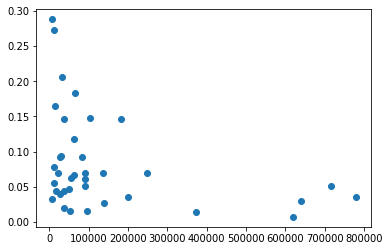

In [70]:
plt.scatter(x=df_plot['Households with own children of the householder under 18 years'],y=df_plot['filing_rate_2020'])

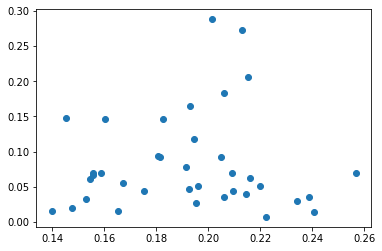

In [71]:
plt.scatter(x=df_plot['pop_over60'],y=df_plot['filing_rate_2020'])

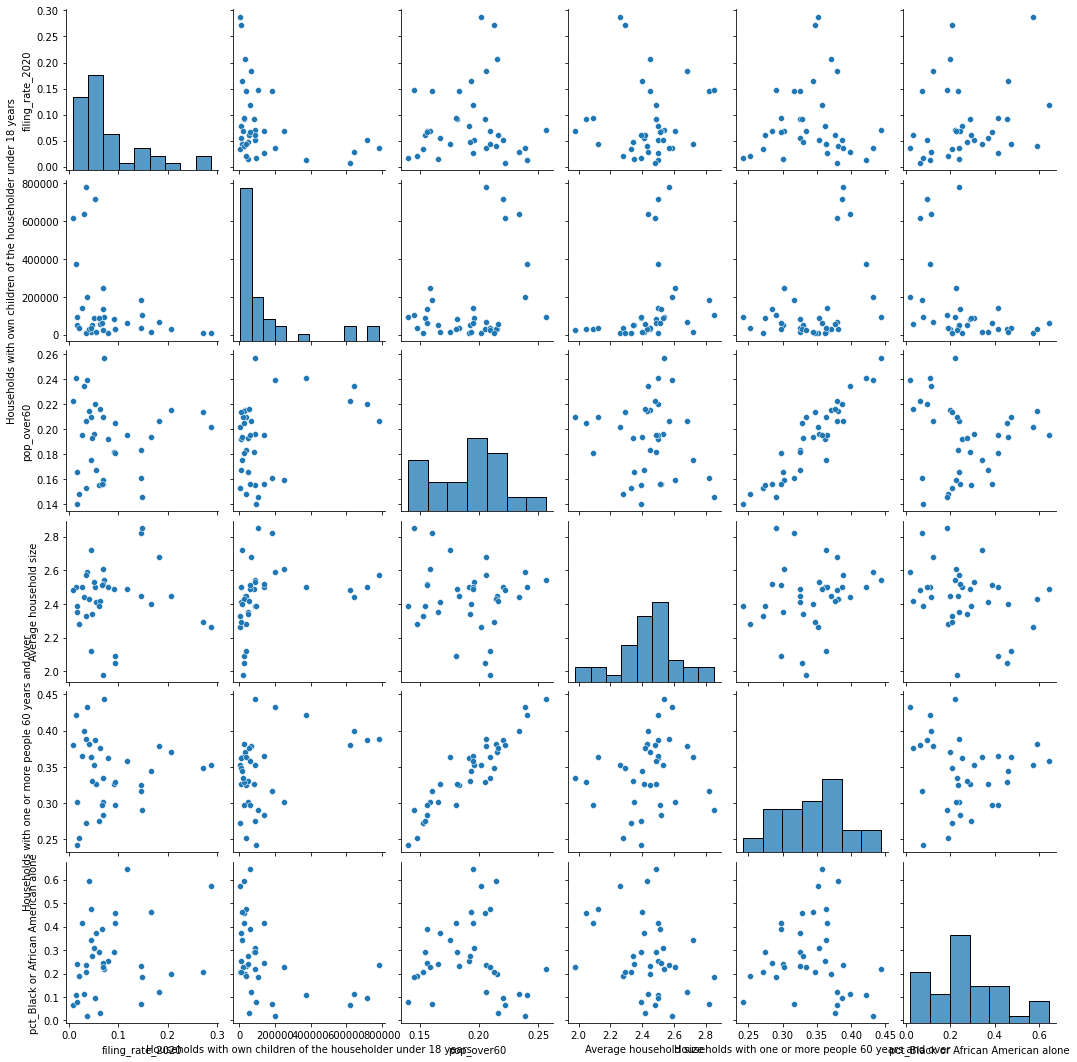

In [67]:
sns.pairplot(df_plot)